In [23]:
from pycaret.regression import setup, compare_models, finalize_model, plot_model, save_model
from pycaret.datasets import get_data
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
insurance_df = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
insurance_df.sample(10)

,age,sex,bmi,children,smoker,region,charges
650,49,female,42.680,2,no,southeast,9800.88820
319,32,male,37.335,1,no,northeast,4667.60765
314,27,female,31.400,0,yes,southwest,34838.87300
150,35,male,24.130,1,no,northwest,5125.21570
336,60,male,25.740,0,no,southeast,12142.57860
970,50,female,28.160,3,no,southeast,10702.64240
169,27,male,18.905,3,no,northeast,4827.90495
684,33,female,18.500,1,no,southwest,4766.02200
1097,22,male,33.770,0,no,southeast,1674.63230
512,51,male,22.420,0,no,northeast,9361.32680


In [26]:
# Aktualizacja wartości w kolumnie `sex`
insurance_df['sex'] = insurance_df['sex'].replace({'male': 'mężczyzna', 'female': 'kobieta'})

# Aktualizacja wartości w kolumnie `smoker`
insurance_df['smoker'] = insurance_df['smoker'].replace({'yes': 'tak', 'no': 'nie'})

# Aktualizacja wartości w kolumnie `region`
insurance_df['region'] = insurance_df['region'].replace({
    'southeast': 'południowy wschód',
    'southwest': 'południowy zachód',
    'northeast': 'północny wschód',
    'northwest': 'północny zachód',
    })
insurance_df.sample(10)

,age,sex,bmi,children,smoker,region,charges
390,48,mężczyzna,35.625,4,nie,północny wschód,10736.87075
1191,41,kobieta,21.755,1,nie,północny wschód,13725.47184
354,18,kobieta,38.280,0,nie,południowy wschód,14133.03775
895,61,kobieta,44.000,0,nie,południowy zachód,13063.88300
179,41,kobieta,33.155,3,nie,północny wschód,8538.28845
449,35,mężczyzna,38.600,1,nie,południowy zachód,4762.32900
884,25,mężczyzna,26.695,4,nie,północny zachód,4877.98105
636,19,kobieta,24.510,1,nie,północny zachód,2709.11190
527,51,kobieta,25.800,1,nie,południowy zachód,9861.02500
231,59,kobieta,27.830,3,nie,południowy wschód,14001.28670


In [27]:
insurance_df['region'].value_counts()

południowy wschód    364
południowy zachód    325
północny zachód      325
północny wschód      324
Name: region, dtype: int64

In [28]:
len(insurance_df)

1338

In [29]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [31]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [32]:
insurance_df[insurance_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,mężczyzna,30.59,0,nie,północny zachód,1639.5631


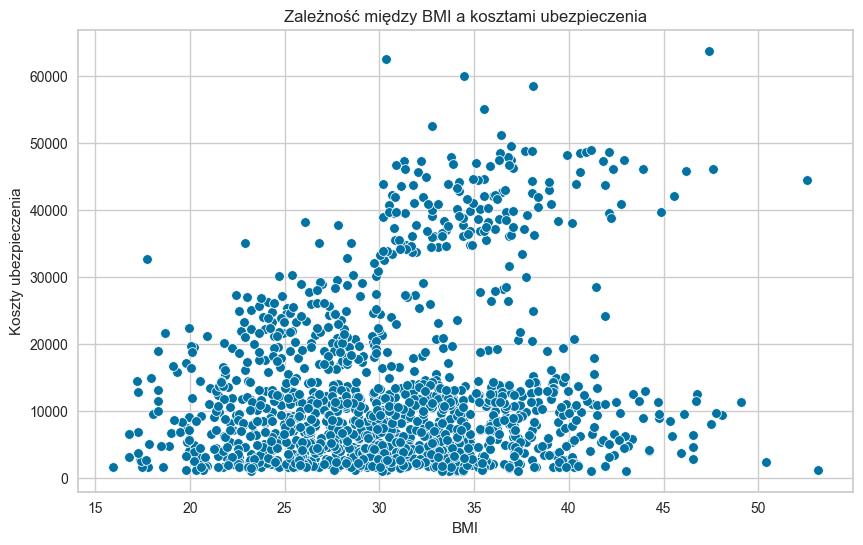

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_df)
plt.title('Zależność między BMI a kosztami ubezpieczenia')
plt.xlabel('BMI')
plt.ylabel('Koszty ubezpieczenia')
plt.grid(True)
plt.show()

In [34]:
s = setup(data=insurance_df, target='charges', session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [35]:
s.dataset.head()

,age,sex,bmi,children,smoker,region,charges
300,36,mężczyzna,27.549999,3,nie,północny wschód,6746.742676
904,60,kobieta,35.099998,0,nie,południowy zachód,12644.588867
670,30,mężczyzna,31.570000,3,nie,południowy wschód,4837.582520
617,49,mężczyzna,25.600000,2,tak,południowy zachód,23306.546875
373,26,mężczyzna,32.900002,2,tak,południowy zachód,36085.218750


In [36]:
s.dataset_transformed.head()

,age,sex,bmi,children,smoker,region_północny wschód,region_południowy zachód,region_południowy wschód,region_północny zachód,charges
300,36.0,1.0,27.549999,3.0,0.0,1.0,0.0,0.0,0.0,6746.742676
904,60.0,0.0,35.099998,0.0,0.0,0.0,1.0,0.0,0.0,12644.588867
670,30.0,1.0,31.570000,3.0,0.0,0.0,0.0,1.0,0.0,4837.582520
617,49.0,1.0,25.600000,2.0,1.0,0.0,1.0,0.0,0.0,23306.546875
373,26.0,1.0,32.900002,2.0,1.0,0.0,1.0,0.0,0.0,36085.218750


In [37]:
best_model = compare_models()
best_model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1580
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.3230
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,3.7300
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.3090
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.2840
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0830
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.1070
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0860
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.1040
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.1110


GradientBoostingRegressor(random_state=123)

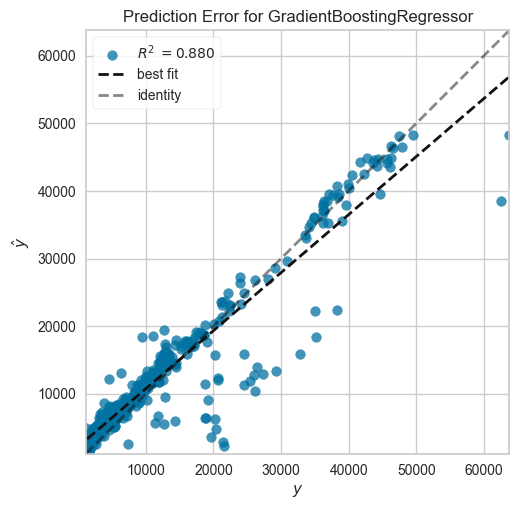

In [38]:
plot_model(best_model, plot='error')

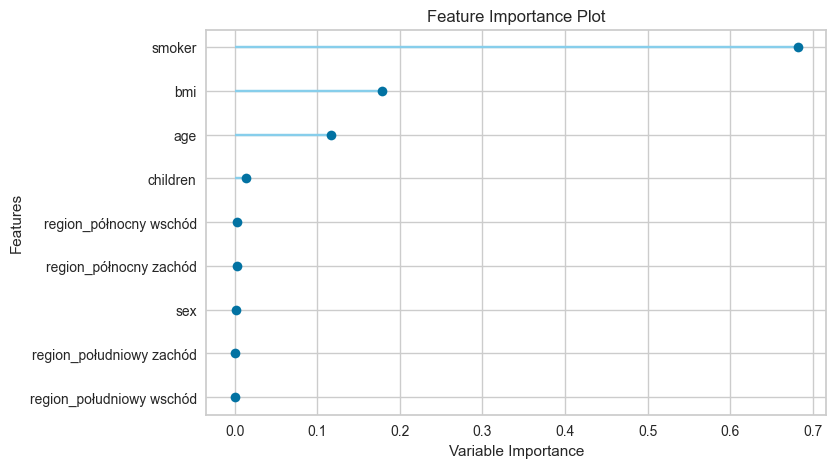

In [39]:
plot_model(best_model, plot='feature')

In [40]:
final_model = finalize_model(best_model)
save_model(final_model, 'v5_insurance_charge_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': kobieta      0
 mężczyzna    1
 NaN         -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type